In [1]:
from fiatlux.optical_object.field_dev import Field
from fiatlux.optical_object.source_dev import Source, PointSource, ExtendedSource
from fiatlux.physical_object.spectrum_dev import (
    Monochromatic,
    Photometric,
    SpectralBand,
)
from fiatlux.optical_object.propagators import FFT
from fiatlux.optical_object.mask import CircularPupil
from fiatlux.optical_object.detector import Detector

import matplotlib.pyplot as plt
import numpy as np


star = PointSource(
    incidence_angles=[-0.1, -0.1],
    spectrum=Photometric(magnitude=8, spectral_band=SpectralBand.V),
)

N = 680
pupil = CircularPupil(physical_diameter=0.1, resolution=8)

detector = Detector(
    quantum_efficiency=1,
    photon_noise=False,
    readout_noise_variance=0,
    dark_current=0,
    exposure_time=.150,
    offset=0,
    bitdepth=12,
    sensitivity=1,
    random_state_generator=np.random.RandomState(
            seed=0
        )
)

field = Field(
    field_size=N,
    sources=[star],
    optical_path=[pupil, FFT(), detector],
)

In [2]:
# resolve field
+field

print(f"source.photon_flux is {star.spectrum.flux}")
print(
    f"It gives following eq.1: {star.spectrum.flux} x {detector.exposure_time} x {pupil._surface} = {star.spectrum.flux * detector.exposure_time * pupil._surface} in the detector plane."
)
print(
    f"Validated with the mesured integral of the noise-free intensity : {np.sum(detector.noise_free_intensity)}"
)
print(
    f"Measured signal in ADU is lower than the noise-free value given to the flooring operation : {np.sum(detector.intensity)} equivalent to {np.sum(detector.noise_free_intensity.astype(int))} with a unitary quantum efficiency and sensitivity."
)

source.photon_flux is 5658041.404306078 ph / (s m2)
It gives following eq.1: 5658041.404306078 ph / (s m2) x 0.15 s x 0.007853981633974483 m2 = 6665.7229910530705 ph in the detector plane.
Validated with the mesured integral of the noise-free intensity : 6665.722991053074 ph
Measured signal in ADU is lower than the noise-free value given to the flooring operation : 5687 adu equivalent to 5687 ph with a unitary quantum efficiency and sensitivity.


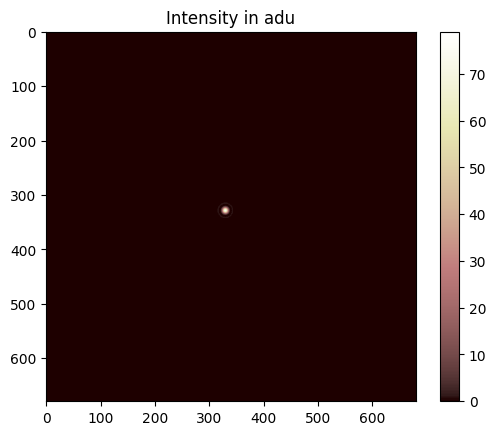

In [3]:
detector.display_intensity()

In [5]:
from DOSSA.satellite_mapping.evscope import Evscope
from DOSSA.satellite_mapping.satellite import Satellite

import astropy.units as u


evscope = Evscope(pixel_scale=1.35, exposure_time=0.150)
field_size, incidence_angles_list = evscope.satellite_frames(
    n_frames=100,
    heading=(-45 * u.degree).to(u.radian),
    satellite=Satellite(altitude=400e3) ,
)

satellite = ExtendedSource(
    incidence_angles_list=incidence_angles_list,
    spectrum=Photometric(magnitude=6, spectral_band=SpectralBand.V),
)

ImportError: attempted relative import with no known parent package